In [26]:
import numpy as np
import dataloader
import matplotlib.pyplot as plt
import math

dataloader = dataloader.DataLoader(Xtrainpath='../data/train-images-idx3-ubyte.gz',
                        Ytrainpath='../data/train-labels-idx1-ubyte.gz',
                        Xtestpath='../data/t10k-images-idx3-ubyte.gz',
                        Ytestpath='../data/t10k-labels-idx1-ubyte.gz')
Xtrain, Ytrain, Xtest, Ytest = dataloader.load_data()
data = np.zeros((60000, 784))
for i in range(60000):
    data[i] = Xtrain[i].flatten() / 255
test = np.zeros((10000, 784))
for i in range(10000):
    test[i] = Xtest[i].flatten() / 255
label = []
for i in range(len(Ytrain)):
    if Ytrain[i] == 0:
        label.append(1)
    else:
        label.append(0)
test_label = []
for i in range(len(Ytest)):
    if Ytest[i] == 0:
        test_label.append(1)
    else:
        test_label.append(0)

In [27]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [28]:
def trainLR(data, label, test, test_label, max_iter, lr):
    W = np.zeros(len(data[0]))
    log_likelihood = []
    accuracy = []
    for i in range(max_iter):
        temp_w = np.zeros(len(data[0]))
        likelihood = 0
        for j in range(len(data)):
            y = label[j]
            y_star = sigmoid(W.T@data[j])
            gradient = y - y_star
            temp_w += gradient * data[j]
            likelihood += label[j]*(data[j].T@W) - np.log(1 + np.exp(W.T@data[j]))
        W += lr * (1 / len(data)) * temp_w
        log_likelihood.append(likelihood)
        count = 0
        for k in range(len(test)):
            if sigmoid(W.T@test[k])>0.5 and test_label[k] == 1:
                count += 1
            if sigmoid(W.T@test[k])<0.5 and test_label[k] == 0:
                count += 1
        accuracy.append(count / len(test_label))
    return W, log_likelihood, accuracy

In [30]:
W, log_likelihood, accuracy = trainLR(data, label, test, test_label, 100, lr=0.1)

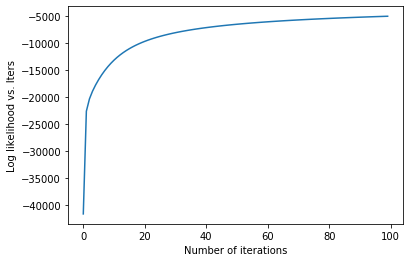

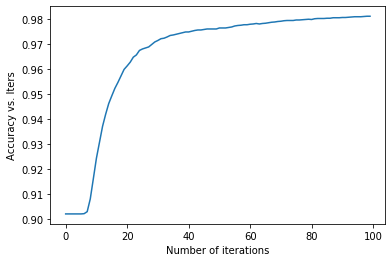

In [31]:
iters = list(range(100))
plt.plot(iters, log_likelihood)
plt.xlabel("Number of iterations")
plt.ylabel("Log likelihood vs. Iters")
plt.show()
plt.plot(iters, accuracy)
plt.xlabel("Number of iterations")
plt.ylabel("Accuracy vs. Iters")
plt.show()